In [79]:
import pandas as pd
import pathlib
import keras
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PROCESSED_DIR = pathlib.Path("../data/processed/")
relevant_entries = ["Bad", "West", "Lene", "Stadion"]

In [3]:
analysis_df = pd.DataFrame()
for time_series_df_path in PROCESSED_DIR.glob("*.csv"):
    if "Bad" in str(time_series_df_path):
        df = pd.read_csv(time_series_df_path)
        analysis_df = analysis_df.append(df)

In [4]:
train_df = analysis_df
test_df = pd.read_csv(PROCESSED_DIR / "Lene_202110222140_scanExport_6027.csv")

In [5]:
def preprocess_df(df: pd.DataFrame) -> pd.DataFrame:
    df = df.rename(columns={"Date":"ds", "CountOfPersons":"y"})
    df["ds"] = pd.to_datetime(df.ds)
    return df

In [6]:
train_df = preprocess_df(train_df)
test_df = preprocess_df(test_df)

In [7]:
dates = {
  datetime.date(2019, 1, 30): "20:30",
  datetime.date(2019, 4, 21): "13:30",
  datetime.date(2019, 5, 3):  "18:30",
 datetime.date(2019, 5, 19):  "15:30",
 datetime.date(2019, 7, 16): "19:30",
 datetime.date(2019, 7, 27): "13:30",
 datetime.date(2019, 8, 18): "13:30",
 datetime.date(2019, 8, 31): "13:30",
 datetime.date(2019, 9, 22): "13:30",
 datetime.date(2019, 10, 26): "13:00",
 datetime.date(2019, 11, 30): "13:00",
 datetime.date(2019, 12, 8): "13:30",
 datetime.date(2020, 1, 29): "20:30",
 datetime.date(2020, 2, 7): "18:30",
 datetime.date(2020, 2, 22): "13:00",
 datetime.date(2020, 3, 8): "13:30"}

In [38]:
game_day_start = str(datetime.date(2019, 1, 30))
game_day_end = str((pd.to_datetime(game_day_start) + pd.Timedelta("1d")).date())
game_day = train_df.query(f"'{game_day_end}' >= ds >= '{game_day_start}'")

In [19]:
dates.values()

dict_values(['20:30', '13:30', '18:30', '15:30', '19:30', '13:30', '13:30', '13:30', '13:30', '13:00', '13:00', '13:30', '20:30', '18:30', '13:00', '13:30'])

In [20]:
dates.keys()

dict_keys([datetime.date(2019, 1, 30), datetime.date(2019, 4, 21), datetime.date(2019, 5, 3), datetime.date(2019, 5, 19), datetime.date(2019, 7, 16), datetime.date(2019, 7, 27), datetime.date(2019, 8, 18), datetime.date(2019, 8, 31), datetime.date(2019, 9, 22), datetime.date(2019, 10, 26), datetime.date(2019, 11, 30), datetime.date(2019, 12, 8), datetime.date(2020, 1, 29), datetime.date(2020, 2, 7), datetime.date(2020, 2, 22), datetime.date(2020, 3, 8)])

In [31]:
datetime.datetime.strptime(start_time,'%H:%M')

datetime.datetime(1900, 1, 1, 13, 30)

In [34]:
datetime.datetime.combine(key,datetime.datetime.strptime(start_time,'%H:%M').time())

datetime.datetime(2020, 3, 8, 13, 30)

In [25]:
start_time = '13:30'
opening_time = str(pd.to_datetime(start_time) - pd.Timedelta("2H"))
game_day.set_index("ds").query(f"'{opening_time}' <= index <= '{start_time}'").values

array([], shape=(0, 1), dtype=int64)

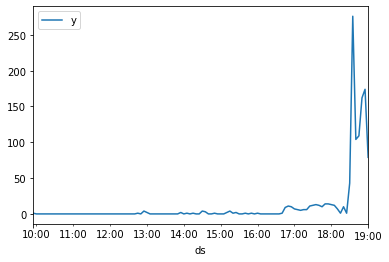

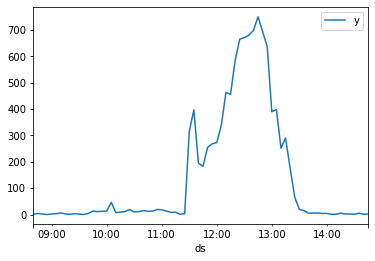

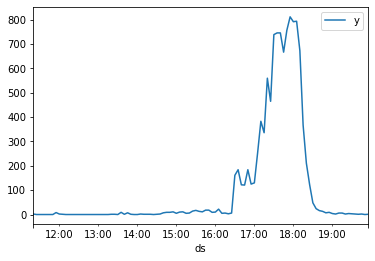

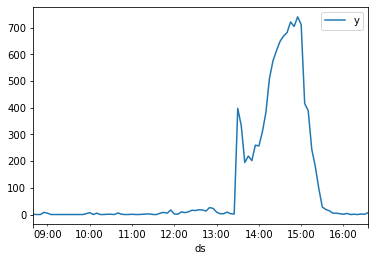

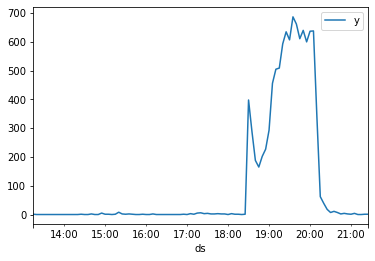

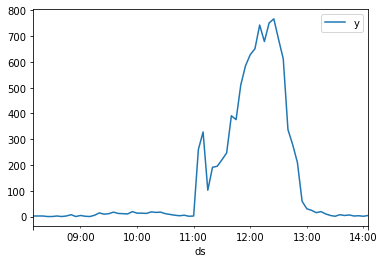

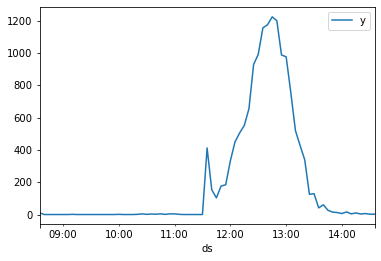

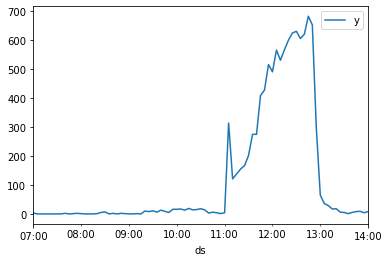

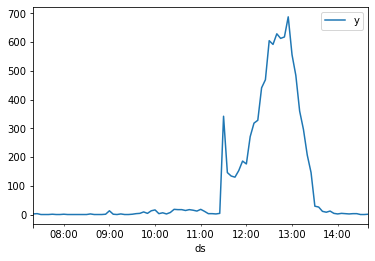

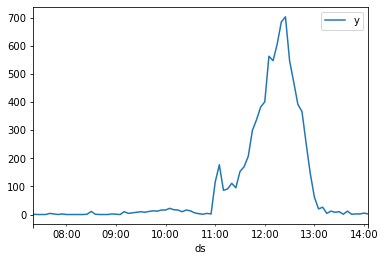

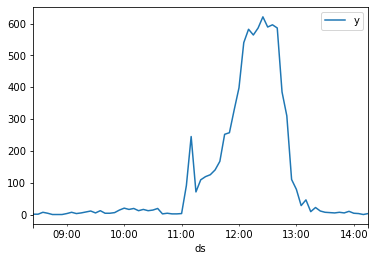

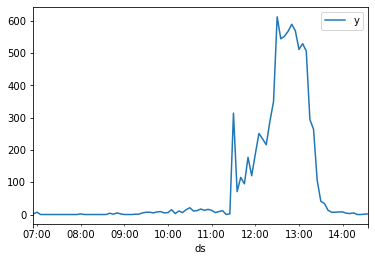

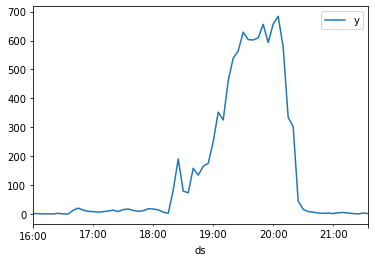

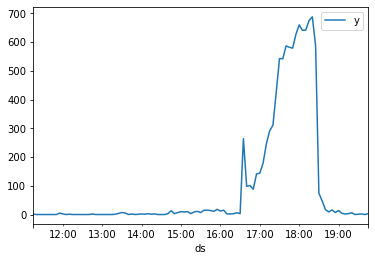

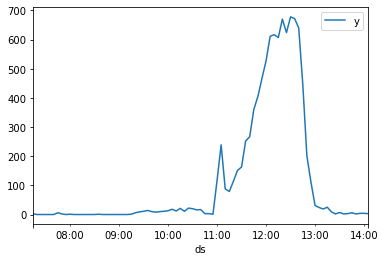

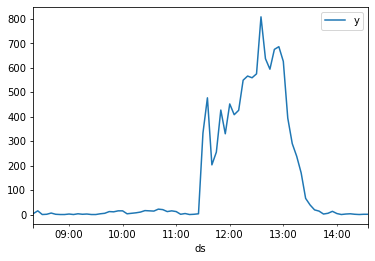

In [83]:
samples = []
for key,value in dates.items():
    game_day_start = str(key)
    game_day_end = str((pd.to_datetime(game_day_start) + pd.Timedelta("1d")).date())
    game_day = train_df.query(f"'{game_day_end}' >= ds >= '{game_day_start}'")
    game_day_sample = create_sample(df=game_day,game_day=key, start_time=value)
    game_day.set_index("ds").plot()
    plt.show()
    samples.append(game_day_sample)


In [82]:
def create_sample(df: pd.DataFrame, game_day, start_time: str) -> pd.DataFrame:
    start_time = datetime.datetime.combine(game_day,datetime.datetime.strptime(start_time,'%H:%M').time())
    opening_time = str(start_time - pd.Timedelta("4H"))
    sample = df.set_index("ds").query(f"'{opening_time}' <= index <= '{start_time}'").values
    return sample